In [3]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
data_train = pd.read_csv("CMaps/test_FD001.txt", header=None, sep=" ")

**Introduction:**

The FD001 dataset comprises time series data from 100 units of turbofan engines, with each unit equipped with 21 sensors and operating under 3 different settings. Initially, each engine operates normally at the commencement of its respective time series but eventually experiences failure towards the conclusion of the time series. Each row in the dataset represents a snapshot of the data captured during a single operational cycle of the engine.

**Data Cleaning:**

In [6]:
index_names = ['Engine', 'Cycle']
setting_names = ['Setting 1', 'Setting 2', 'Setting 3']
sensor_names=[ "(Fan Inlet Temperature) (◦R)",
"(LPC Outlet Temperature) (◦R)",
"(HPC Outlet Temperature) (◦R)",
"(LPT Outlet Temperature) (◦R)",
"(Fan Inlet Pressure) (psia)",
"(Bypass-Duct Pressure) (psia)",
"(HPC Outlet Pressure) (psia)",
"(Physical Fan Speed) (rpm)",
"(Physical Core Speed) (rpm)",
"(Engine Pressure Ratio(P50/P2)",
"(HPC Outlet Static Pressure) (psia)",
"(Ratio of Fuel Flow to Ps30) (pps/psia)",
"(Corrected Fan Speed) (rpm)",
"(Corrected Core Speed) (rpm)",
"(Bypass Ratio) ",
"(Burner Fuel-Air Ratio)",
"(Bleed Enthalpy)",
"(Required Fan Speed)",
"(Required Fan Conversion Speed)",
"(High-Pressure Turbines Cool Air Flow)",
"(Low-Pressure Turbines Cool Air Flow)",
"Sensor 26",
"Sensor 27"]
col_names = index_names + setting_names + sensor_names

In [7]:
data_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,1.309600e+04,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.0,13096.0,13096.000000,13096.000000,0.0,0.0
mean,51.543907,76.836515,-0.000011,0.000004,100.0,5.186700e+02,642.475088,1588.099204,1404.735362,1.462000e+01,21.609701,553.757523,2388.070964,9058.407363,1.300000e+00,47.416204,521.747724,2388.071025,8138.947817,8.425844,3.000000e-02,392.571625,2388.0,100.0,38.892502,23.335743,NaN,NaN
std,28.289423,53.057749,0.002203,0.000294,0.0,6.014263e-11,0.400899,5.003274,6.688309,2.671743e-12,0.001704,0.681286,0.057442,11.436261,3.157595e-13,0.195917,0.559627,0.056934,10.188605,0.029009,8.823140e-15,1.233577,0.0,0.0,0.141681,0.084120,NaN,NaN
min,1.000000,1.000000,-0.008200,-0.000600,100.0,5.186700e+02,641.130000,1569.040000,1384.390000,1.462000e+01,21.600000,550.880000,2387.890000,9024.530000,1.300000e+00,46.800000,519.380000,2387.890000,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400,NaN,NaN
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.197500,1584.600000,1399.950000,1.462000e+01,21.610000,553.310000,2388.030000,9051.020000,1.300000e+00,47.270000,521.380000,2388.030000,8132.310000,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600,NaN,NaN
50%,52.000000,69.000000,0.000000,0.000000,100.0,5.186700e+02,642.460000,1587.990000,1404.440000,1.462000e+01,21.610000,553.800000,2388.070000,9057.320000,1.300000e+00,47.410000,521.780000,2388.070000,8138.390000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200,NaN,NaN
75%,76.000000,113.000000,0.001500,0.000300,100.0,5.186700e+02,642.740000,1591.362500,1409.050000,1.462000e+01,21.610000,554.240000,2388.110000,9064.110000,1.300000e+00,47.540000,522.150000,2388.110000,8144.360000,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600,NaN,NaN
max,100.000000,303.000000,0.007800,0.000700,100.0,5.186700e+02,644.300000,1607.550000,1433.360000,1.462000e+01,21.610000,555.840000,2388.300000,9155.030000,1.300000e+00,48.260000,523.760000,2388.320000,8220.480000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900,NaN,NaN


In [8]:
data_train.columns = col_names
data_train.describe()

,Engine,Cycle,Setting 1,Setting 2,Setting 3,(Fan Inlet Temperature) (◦R),(LPC Outlet Temperature) (◦R),(HPC Outlet Temperature) (◦R),(LPT Outlet Temperature) (◦R),(Fan Inlet Pressure) (psia),(Bypass-Duct Pressure) (psia),(HPC Outlet Pressure) (psia),(Physical Fan Speed) (rpm),(Physical Core Speed) (rpm),(Engine Pressure Ratio(P50/P2),(HPC Outlet Static Pressure) (psia),(Ratio of Fuel Flow to Ps30) (pps/psia),(Corrected Fan Speed) (rpm),(Corrected Core Speed) (rpm),(Bypass Ratio),(Burner Fuel-Air Ratio),(Bleed Enthalpy),(Required Fan Speed),(Required Fan Conversion Speed),(High-Pressure Turbines Cool Air Flow),(Low-Pressure Turbines Cool Air Flow),Sensor 26,Sensor 27
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,1.309600e+04,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.0,13096.0,13096.000000,13096.000000,0.0,0.0
mean,51.543907,76.836515,-0.000011,0.000004,100.0,5.186700e+02,642.475088,1588.099204,1404.735362,1.462000e+01,21.609701,553.757523,2388.070964,9058.407363,1.300000e+00,47.416204,521.747724,2388.071025,8138.947817,8.425844,3.000000e-02,392.571625,2388.0,100.0,38.892502,23.335743,NaN,NaN
std,28.289423,53.057749,0.002203,0.000294,0.0,6.014263e-11,0.400899,5.003274,6.688309,2.671743e-12,0.001704,0.681286,0.057442,11.436261,3.157595e-13,0.195917,0.559627,0.056934,10.188605,0.029009,8.823140e-15,1.233577,0.0,0.0,0.141681,0.084120,NaN,NaN
min,1.000000,1.000000,-0.008200,-0.000600,100.0,5.186700e+02,641.130000,1569.040000,1384.390000,1.462000e+01,21.600000,550.880000,2387.890000,9024.530000,1.300000e+00,46.800000,519.380000,2387.890000,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400,NaN,NaN
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.197500,1584.600000,1399.950000,1.462000e+01,21.610000,553.310000,2388.030000,9051.020000,1.300000e+00,47.270000,521.380000,2388.030000,8132.310000,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600,NaN,NaN
50%,52.000000,69.000000,0.000000,0.000000,100.0,5.186700e+02,642.460000,1587.990000,1404.440000,1.462000e+01,21.610000,553.800000,2388.070000,9057.320000,1.300000e+00,47.410000,521.780000,2388.070000,8138.390000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200,NaN,NaN
75%,76.000000,113.000000,0.001500,0.000300,100.0,5.186700e+02,642.740000,1591.362500,1409.050000,1.462000e+01,21.610000,554.240000,2388.110000,9064.110000,1.300000e+00,47.540000,522.150000,2388.110000,8144.360000,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600,NaN,NaN
max,100.000000,303.000000,0.007800,0.000700,100.0,5.186700e+02,644.300000,1607.550000,1433.360000,1.462000e+01,21.610000,555.840000,2388.300000,9155.030000,1.300000e+00,48.260000,523.760000,2388.320000,8220.480000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900,NaN,NaN


In [9]:
data_train.drop(labels = ["Sensor 26", "Sensor 27"], axis=1, inplace=True)

**Understanding the data:**

In [10]:
data_train.shape

(13096, 26)

In [11]:
data_train

,Engine,Cycle,Setting 1,Setting 2,Setting 3,(Fan Inlet Temperature) (◦R),(LPC Outlet Temperature) (◦R),(HPC Outlet Temperature) (◦R),(LPT Outlet Temperature) (◦R),(Fan Inlet Pressure) (psia),(Bypass-Duct Pressure) (psia),(HPC Outlet Pressure) (psia),(Physical Fan Speed) (rpm),(Physical Core Speed) (rpm),(Engine Pressure Ratio(P50/P2),(HPC Outlet Static Pressure) (psia),(Ratio of Fuel Flow to Ps30) (pps/psia),(Corrected Fan Speed) (rpm),(Corrected Core Speed) (rpm),(Bypass Ratio),(Burner Fuel-Air Ratio),(Bleed Enthalpy),(Required Fan Speed),(Required Fan Conversion Speed),(High-Pressure Turbines Cool Air Flow),(Low-Pressure Turbines Cool Air Flow)
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,2388.02,9142.37,1.3,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,2388.05,9140.68,1.3,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,1.3,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,1.3,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [12]:
data_train.dtypes

Engine                                       int64
Cycle                                        int64
Setting 1                                  float64
Setting 2                                  float64
Setting 3                                  float64
(Fan Inlet Temperature) (◦R)               float64
(LPC Outlet Temperature) (◦R)              float64
(HPC Outlet Temperature) (◦R)              float64
(LPT Outlet Temperature) (◦R)              float64
(Fan Inlet Pressure) (psia)                float64
(Bypass-Duct Pressure) (psia)              float64
(HPC Outlet Pressure) (psia)               float64
(Physical Fan Speed) (rpm)                 float64
(Physical Core Speed) (rpm)                float64
(Engine Pressure Ratio(P50/P2)             float64
(HPC Outlet Static Pressure) (psia)        float64
(Ratio of Fuel Flow to Ps30) (pps/psia)    float64
(Corrected Fan Speed) (rpm)                float64
(Corrected Core Speed) (rpm)               float64
(Bypass Ratio)                 

In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Engine                                   13096 non-null  int64  
 1   Cycle                                    13096 non-null  int64  
 2   Setting 1                                13096 non-null  float64
 3   Setting 2                                13096 non-null  float64
 4   Setting 3                                13096 non-null  float64
 5   (Fan Inlet Temperature) (◦R)             13096 non-null  float64
 6   (LPC Outlet Temperature) (◦R)            13096 non-null  float64
 7   (HPC Outlet Temperature) (◦R)            13096 non-null  float64
 8   (LPT Outlet Temperature) (◦R)            13096 non-null  float64
 9   (Fan Inlet Pressure) (psia)              13096 non-null  float64
 10  (Bypass-Duct Pressure) (psia)            13096

In [14]:
data_train.describe()

,Engine,Cycle,Setting 1,Setting 2,Setting 3,(Fan Inlet Temperature) (◦R),(LPC Outlet Temperature) (◦R),(HPC Outlet Temperature) (◦R),(LPT Outlet Temperature) (◦R),(Fan Inlet Pressure) (psia),(Bypass-Duct Pressure) (psia),(HPC Outlet Pressure) (psia),(Physical Fan Speed) (rpm),(Physical Core Speed) (rpm),(Engine Pressure Ratio(P50/P2),(HPC Outlet Static Pressure) (psia),(Ratio of Fuel Flow to Ps30) (pps/psia),(Corrected Fan Speed) (rpm),(Corrected Core Speed) (rpm),(Bypass Ratio),(Burner Fuel-Air Ratio),(Bleed Enthalpy),(Required Fan Speed),(Required Fan Conversion Speed),(High-Pressure Turbines Cool Air Flow),(Low-Pressure Turbines Cool Air Flow)
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,1.309600e+04,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.0,13096.0,13096.000000,13096.000000
mean,51.543907,76.836515,-0.000011,0.000004,100.0,5.186700e+02,642.475088,1588.099204,1404.735362,1.462000e+01,21.609701,553.757523,2388.070964,9058.407363,1.300000e+00,47.416204,521.747724,2388.071025,8138.947817,8.425844,3.000000e-02,392.571625,2388.0,100.0,38.892502,23.335743
std,28.289423,53.057749,0.002203,0.000294,0.0,6.014263e-11,0.400899,5.003274,6.688309,2.671743e-12,0.001704,0.681286,0.057442,11.436261,3.157595e-13,0.195917,0.559627,0.056934,10.188605,0.029009,8.823140e-15,1.233577,0.0,0.0,0.141681,0.084120
min,1.000000,1.000000,-0.008200,-0.000600,100.0,5.186700e+02,641.130000,1569.040000,1384.390000,1.462000e+01,21.600000,550.880000,2387.890000,9024.530000,1.300000e+00,46.800000,519.380000,2387.890000,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.197500,1584.600000,1399.950000,1.462000e+01,21.610000,553.310000,2388.030000,9051.020000,1.300000e+00,47.270000,521.380000,2388.030000,8132.310000,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600
50%,52.000000,69.000000,0.000000,0.000000,100.0,5.186700e+02,642.460000,1587.990000,1404.440000,1.462000e+01,21.610000,553.800000,2388.070000,9057.320000,1.300000e+00,47.410000,521.780000,2388.070000,8138.390000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200
75%,76.000000,113.000000,0.001500,0.000300,100.0,5.186700e+02,642.740000,1591.362500,1409.050000,1.462000e+01,21.610000,554.240000,2388.110000,9064.110000,1.300000e+00,47.540000,522.150000,2388.110000,8144.360000,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600
max,100.000000,303.000000,0.007800,0.000700,100.0,5.186700e+02,644.300000,1607.550000,1433.360000,1.462000e+01,21.610000,555.840000,2388.300000,9155.030000,1.300000e+00,48.260000,523.760000,2388.320000,8220.480000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900


In [15]:
data_train.isnull().sum()

Engine                                     0
Cycle                                      0
Setting 1                                  0
Setting 2                                  0
Setting 3                                  0
(Fan Inlet Temperature) (◦R)               0
(LPC Outlet Temperature) (◦R)              0
(HPC Outlet Temperature) (◦R)              0
(LPT Outlet Temperature) (◦R)              0
(Fan Inlet Pressure) (psia)                0
(Bypass-Duct Pressure) (psia)              0
(HPC Outlet Pressure) (psia)               0
(Physical Fan Speed) (rpm)                 0
(Physical Core Speed) (rpm)                0
(Engine Pressure Ratio(P50/P2)             0
(HPC Outlet Static Pressure) (psia)        0
(Ratio of Fuel Flow to Ps30) (pps/psia)    0
(Corrected Fan Speed) (rpm)                0
(Corrected Core Speed) (rpm)               0
(Bypass Ratio)                             0
(Burner Fuel-Air Ratio)                    0
(Bleed Enthalpy)                           0
(Required 

In [16]:
data_train.head(10)

,Engine,Cycle,Setting 1,Setting 2,Setting 3,(Fan Inlet Temperature) (◦R),(LPC Outlet Temperature) (◦R),(HPC Outlet Temperature) (◦R),(LPT Outlet Temperature) (◦R),(Fan Inlet Pressure) (psia),(Bypass-Duct Pressure) (psia),(HPC Outlet Pressure) (psia),(Physical Fan Speed) (rpm),(Physical Core Speed) (rpm),(Engine Pressure Ratio(P50/P2),(HPC Outlet Static Pressure) (psia),(Ratio of Fuel Flow to Ps30) (pps/psia),(Corrected Fan Speed) (rpm),(Corrected Core Speed) (rpm),(Bypass Ratio),(Burner Fuel-Air Ratio),(Bleed Enthalpy),(Required Fan Speed),(Required Fan Conversion Speed),(High-Pressure Turbines Cool Air Flow),(Low-Pressure Turbines Cool Air Flow)
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
5,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,21.61,554.22,2388.00,9050.96,1.3,47.26,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467
6,1,7,-0.0000,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,21.61,553.89,2388.05,9051.39,1.3,47.31,522.01,2388.06,8134.97,8.3914,0.03,391,2388,100.0,38.85,23.3952
7,1,8,0.0006,-0.0000,100.0,518.67,642.54,1580.89,1400.89,14.62,21.61,553.59,2388.05,9052.86,1.3,47.21,522.09,2388.06,8125.93,8.4213,0.03,393,2388,100.0,39.05,23.3224
8,1,9,-0.0036,0.0000,100.0,518.67,641.88,1593.29,1412.28,14.62,21.61,554.49,2388.06,9048.55,1.3,47.37,522.03,2388.05,8134.15,8.4353,0.03,391,2388,100.0,39.10,23.4521
9,1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,21.61,554.28,2388.04,9051.95,1.3,47.14,522.00,2388.06,8134.08,8.4093,0.03,391,2388,100.0,38.87,23.3820


In [17]:
data_train.nunique()

Engine                                      100
Cycle                                       303
Setting 1                                   150
Setting 2                                    14
Setting 3                                     1
(Fan Inlet Temperature) (◦R)                  1
(LPC Outlet Temperature) (◦R)               262
(HPC Outlet Temperature) (◦R)              2361
(LPT Outlet Temperature) (◦R)              2954
(Fan Inlet Pressure) (psia)                   1
(Bypass-Duct Pressure) (psia)                 2
(HPC Outlet Pressure) (psia)                415
(Physical Fan Speed) (rpm)                   41
(Physical Core Speed) (rpm)                4047
(Engine Pressure Ratio(P50/P2)                1
(HPC Outlet Static Pressure) (psia)         136
(Ratio of Fuel Flow to Ps30) (pps/psia)     357
(Corrected Fan Speed) (rpm)                  43
(Corrected Core Speed) (rpm)               3786
(Bypass Ratio)                             1506
(Burner Fuel-Air Ratio)                 

**Data Visualization:**

Let's generate a bar plot to represent the cumulative cycle count for each engine.

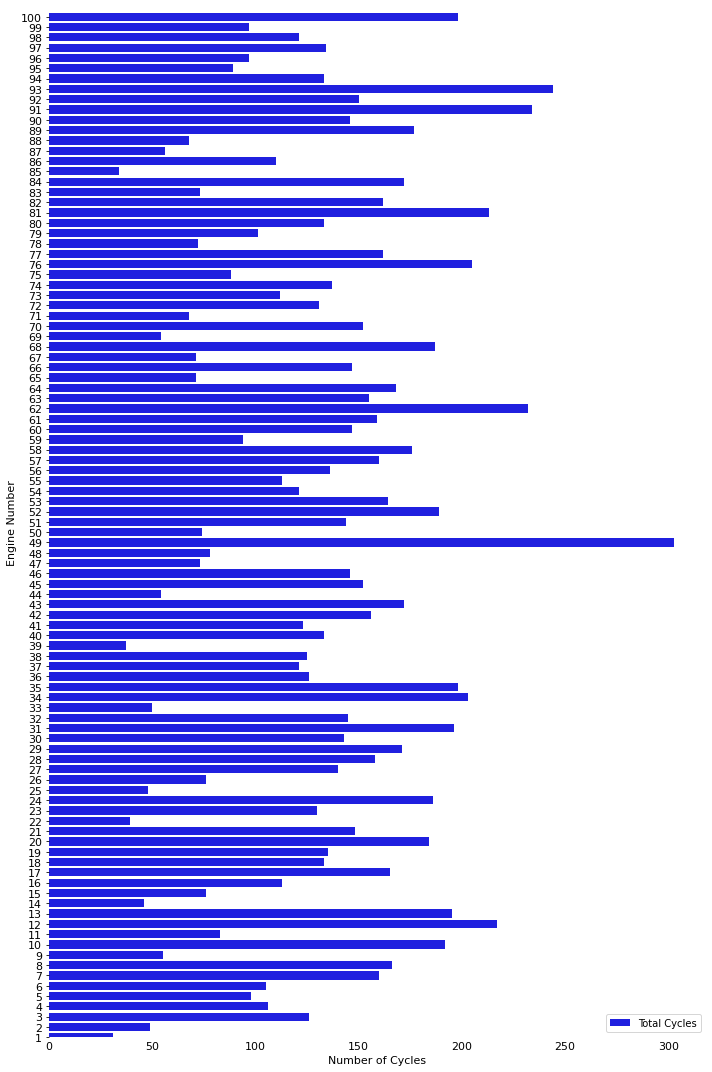

In [18]:
data_train = data_train.groupby(['Engine'])[["Engine" ,"Cycle"]].max()

f, ax = plt.subplots(figsize=(10, 15))
sns.set_color_codes("pastel")
sns.barplot(x="Cycle", y="Engine", data=data_train, label="Total Cycles", color="blue", orient = 'h', dodge=False)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylim=(0, 100), ylabel="",xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)
ax.tick_params(labelsize=11)
ax.tick_params(length=0, axis='x')
ax.set_ylabel("Engine Number", fontsize=11)
ax.set_xlabel("Number of Cycles", fontsize=11)
plt.tight_layout()
plt.show()

Let's calculate the mean number of cycles until failure for the Turbofan Jet Engine using a histogram.

The mean number of cycles after which the Turbofan Jet Engine fails is 130


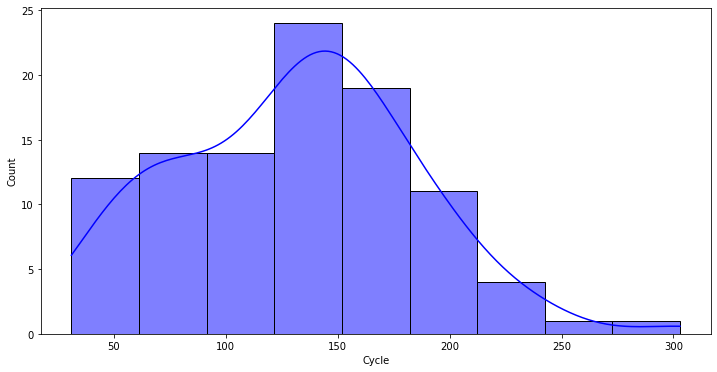

In [19]:
plt.subplots(figsize=(12, 6))
sns.histplot(data_train["Cycle"], kde = True, color='blue');
print("The mean number of cycles after which the Turbofan Jet Engine fails is "+ str(math.floor(data_train["Cycle"].mean())))

To gain a deeper understanding of sensor data, we will create histograms.

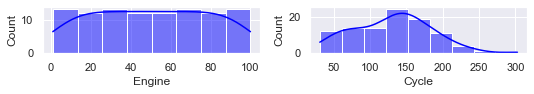

In [20]:
sns.set()
fig = plt.figure(figsize = [15,10])
cols = data_train.columns
cnt = 1
for col in cols:
    plt.subplot(8,4,cnt)
    sns.histplot(data_train[col],color='blue', kde=True)
    cnt+=1
plt.tight_layout()
plt.show() 

As evident from our observations, several sensor datasets do not conform to the normal distribution. To gain insights into these patterns, we will construct box plots for a better understanding of the underlying trends.

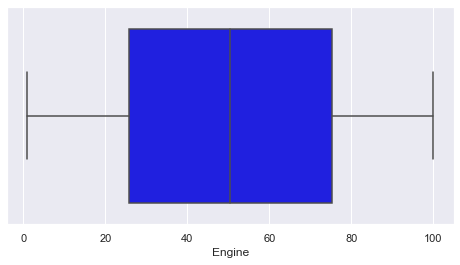

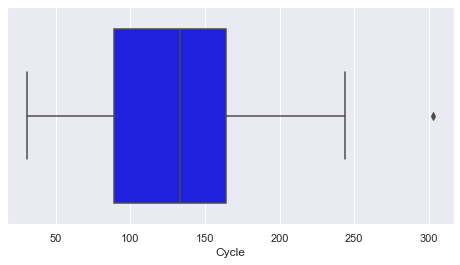

In [21]:
for i in data_train.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data_train[i], color='blue')
    plt.show()

Upon careful examination of our box plots, it is evident that outliers are present, indicating the presence of data containing a single unique value. To investigate potential correlations, we will construct a heatmap.

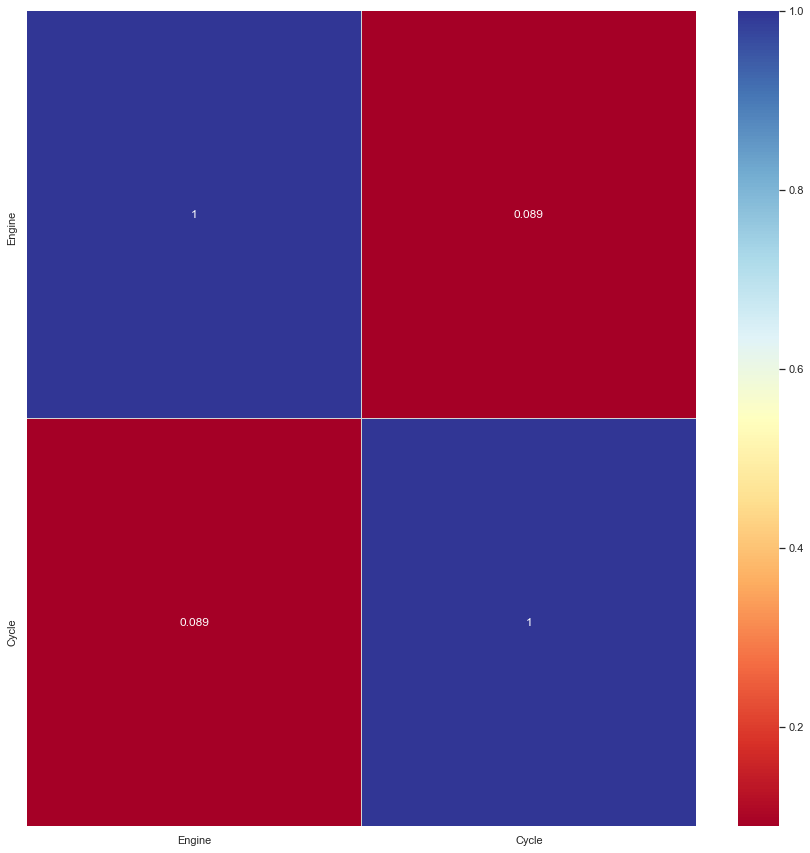

In [22]:
plt.figure(figsize=(15,15))
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
dt_cr = data_train.corr()
plot_kws={"s": 1}
sns.heatmap(data_train.corr(),
            cmap='RdYlBu',
            annot=True,
            linewidths= 0.2,
            linecolor='lightgrey').set_facecolor('white')

The profiling report has been generated to identify outliers, coorrelations, missing values, and data distributions. It is apparent that the dataset exhibits an imbalance.

In [23]:
%%time
profile = ProfileReport(data_train,
                       title = "NASA Turbofan Jet Engine Data Analysis",
                       dataset={"description": "This profiling report was generated for Shahbaz Abdullah Magsi", "copyright_holder": "Shahbaz Abdullah Magsi", "copyright_year": "2023"},
                       explorative=True)
profile

Wall time: 9.54 ms


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

ValueError: 'Engine' is both an index level and a column label, which is ambiguous.

**Conclusion:**

In conclusion, our comprehensive data analysis project on the NASA Turbofan Jet Engine has provided valuable insights into its performance and reliability. Through the utilization of various data visualization techniques, we identified outliers, observed imbalanced data, and gained a deeper understanding of sensor data characteristics. This analysis has contributed to a better understanding of the engine's behavior and potential areas for improvement. Moving forward, these findings can inform maintenance and operational strategies to enhance the overall efficiency and longevity of the Turbofan Jet Engine, ultimately advancing the field of aerospace engineering. Thank you for following along.